In [1]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raw_df = pd.read_csv("Raw-Data-HR-Employee-Attrition.csv")
raw_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
! dir

 Volume in drive C is OSDisk
 Volume Serial Number is 625E-2C4D

 Directory of C:\Users\smembaye\Desktop\Rice University\Sarai Embaye - Homework Assignment\Project-1

03/18/2020  07:11 PM    <DIR>          .
03/18/2020  07:11 PM    <DIR>          ..
03/09/2020  08:05 PM             1,928 .gitignore
03/18/2020  05:06 PM    <DIR>          .ipynb_checkpoints
03/18/2020  07:11 PM            18,223 Data_Analysis.ipynb
03/16/2020  06:52 PM           797,590 Project 1 - Group 6 - Data Set Analysis - 03.21.2020.pptx
03/18/2020  04:56 PM           227,974 Raw-Data-HR-Employee-Attrition.csv
03/09/2020  08:05 PM                28 README.md
               5 File(s)      1,045,743 bytes
               3 Dir(s)  169,881,714,688 bytes free


In [5]:
#Grabbing columns for Referance Purposes
raw_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [17]:


genderpr = pd.DataFrame(raw_df.groupby(['Gender', 'PerformanceRating'])['DailyRate'].count())
genderpr.reset_index(inplace=True)
genderpr.columns = ['gender', 'rating', 'count']
genderpr



,gender,rating,count
0,Female,3,494
1,Female,4,94
2,Male,3,750
3,Male,4,132


In [13]:
# Confirming Rating Amounts within the DataSet
raw_df.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [23]:
# Creating 3 lists of 2 items
labels = genderpr.rating.unique()
male_count = genderpr[genderpr.gender == 'Male']['count']
female_count = genderpr[genderpr.gender == 'Female']['count']


<IPython.core.display.Javascript object>


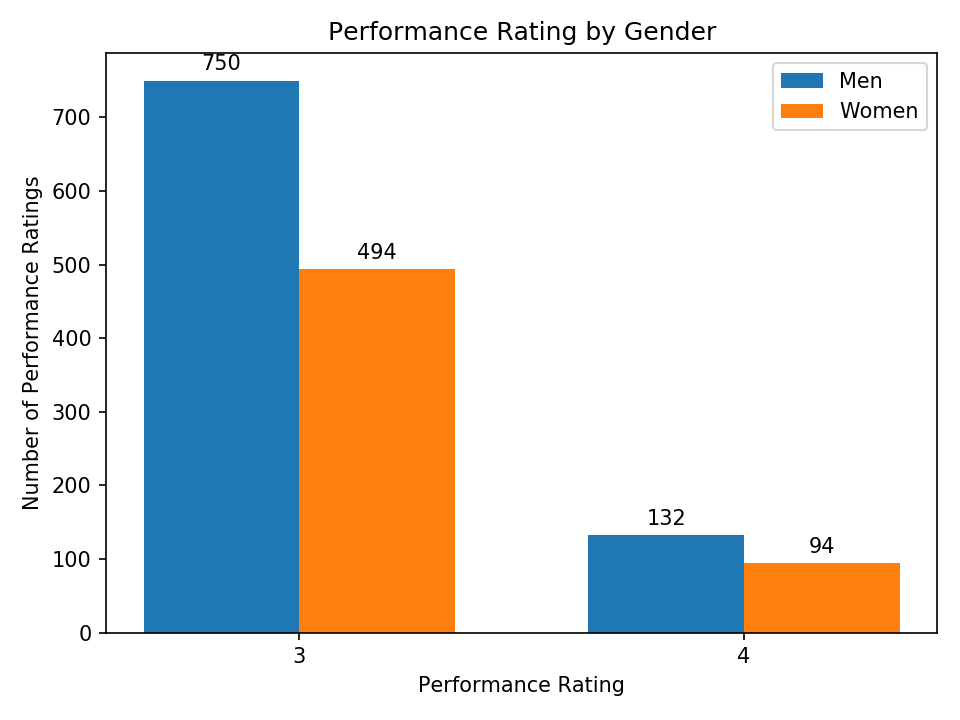

In [25]:
#Code Direction Provided From Matplotlib Documentation 
#https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

x = np.arange(len(labels))  # the label performance rating
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label='Men')
rects2 = ax.bar(x + width/2, female_count, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Performance Ratings')
ax.set_xlabel('Performance Rating')
ax.set_title('Performance Rating by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()